<a href="https://colab.research.google.com/github/nisha1365/precisionFDA/blob/main/XGBClassifier_SMOTE_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
sample_df = pd.read_csv("/content/sample_df_train (1).csv")
sample_df.head()

,Unnamed: 0,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,112422,143813,"69_Dental caries on smooth surface,69_Dental c...","68_TD (ADULT), 2 LF TETANUS TOXOID, PRESERVATI...","25 OH VITAMIN D_34.09355501418554,A BASO #_0.0...",69.0,120.0,7.0,86.0,18.0,93.482373,1
1,37897,48430,"76_Low back pain,76_Cervicalgia,76_Other stres...","75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","A/G RATIO_1.0,A1c_8.236032038989142,ACTIVATED ...",63.0,89.0,9.0,95.0,21.0,99.936185,0
2,17169,21949,85_Problem related to unspecified psychosocial...,"84_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...",ABSOLUTE BASOPHIL COUNT (AUTO)_0.0287499219743...,75.0,154.0,0.0,78.0,16.0,99.815148,1
3,71014,90695,74_Type 2 diabetes mellitus with neurological ...,"71_FLU,3 YRS (HISTORICAL),71_INFLUENZA, UNSPEC...","ALT_10.0,APPEARANCE_CLEAR,AST_16.0,BASO%_0.800...",79.0,112.0,1.0,1.0,1.0,1.000000,1
4,108915,139292,"93_Sleep apnea,93_Presence of cardiac pacemake...","92_INFLUENZA, HIGH DOSE SEASONAL","ABSOLUTE BASOPHIL COUNT_0.019025756232656503,A...",79.0,134.0,0.0,61.0,16.0,98.868134,1


In [3]:
sample_df.drop('Unnamed: 0', axis = 1, inplace = True)
sample_df

,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,143813,"69_Dental caries on smooth surface,69_Dental c...","68_TD (ADULT), 2 LF TETANUS TOXOID, PRESERVATI...","25 OH VITAMIN D_34.09355501418554,A BASO #_0.0...",69.0,120.0,7.0,86.0,18.0,93.482373,1
1,48430,"76_Low back pain,76_Cervicalgia,76_Other stres...","75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","A/G RATIO_1.0,A1c_8.236032038989142,ACTIVATED ...",63.0,89.0,9.0,95.0,21.0,99.936185,0
2,21949,85_Problem related to unspecified psychosocial...,"84_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...",ABSOLUTE BASOPHIL COUNT (AUTO)_0.0287499219743...,75.0,154.0,0.0,78.0,16.0,99.815148,1
3,90695,74_Type 2 diabetes mellitus with neurological ...,"71_FLU,3 YRS (HISTORICAL),71_INFLUENZA, UNSPEC...","ALT_10.0,APPEARANCE_CLEAR,AST_16.0,BASO%_0.800...",79.0,112.0,1.0,1.0,1.0,1.000000,1
4,139292,"93_Sleep apnea,93_Presence of cardiac pacemake...","92_INFLUENZA, HIGH DOSE SEASONAL","ABSOLUTE BASOPHIL COUNT_0.019025756232656503,A...",79.0,134.0,0.0,61.0,16.0,98.868134,1
...,...,...,...,...,...,...,...,...,...,...,...
29995,143087,69_Long term (current) use of anticoagulants a...,"68_INFLUENZA, UNSPECIFIED FORMULATION,68_INFLU...","ABSOLUTE BASOPHIL COUNT_0.02997330786973093,AB...",74.0,113.0,0.0,93.0,20.0,92.916039,1
29996,83441,85_Other specified counseling,"85_INFLUENZA, UNSPECIFIED FORMULATION","ALBUMIN (FV)_3.7726733832125037,ALBUMIN (MV)*I...",62.0,140.0,3.0,66.0,20.0,100.179957,1
29997,164680,"58_Alcohol dependence,58_Alcohol dependence,58...","57_INFLUENZA, UNSPECIFIED FORMULATION",(OLD) HEPATITIS C ANTIBODY DC'd 32119_Nonreact...,99.0,170.0,0.0,107.0,21.0,96.000000,1
29998,17711,65_Encounter for immunization,"65_COVID-19 (MODERNA), MRNA, LNP-S, PF, 100 MC...",ABSOLUTE BASOPHIL COUNT (AUTO)_0.0504705456736...,81.0,160.0,0.0,77.0,18.0,101.672149,1


In [4]:
!pip install gensim

In [5]:
from gensim.models import Word2Vec, KeyedVectors
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
sample_df['Condition_code_icd10_subcategory'] = sample_df['Condition_code_icd10_subcategory'].apply(nltk.word_tokenize)
sample_df['immunization'] = sample_df['immunization'].apply(nltk.word_tokenize)
sample_df['Lab_test_description_Result'] = sample_df['Lab_test_description_Result'].apply(nltk.word_tokenize)

In [7]:
sentences = sample_df['Condition_code_icd10_subcategory'] + sample_df['immunization'] + sample_df['Lab_test_description_Result']
model = Word2Vec(sentences, min_count=1)

In [8]:
import numpy as np

In [9]:
def text_to_vector(text):
  vec = []
  for word in text:
    if word in model.wv:
      vec.append(model.wv[word])
  return np.mean(vec, axis = 0) if vec else np.zeros(model.vector_size)

sample_df['condition_vector'] = sample_df['Condition_code_icd10_subcategory'].apply(text_to_vector)
sample_df['immunization_vector'] = sample_df['immunization'].apply(text_to_vector)
sample_df['Lab_vector'] = sample_df['Lab_test_description_Result'].apply(text_to_vector)


sample_df['condition_vector'] = sample_df['condition_vector'].apply(lambda x: np.max(x) if isinstance (x, np.ndarray) else 0)
sample_df['immunization_vector'] = sample_df['immunization_vector'].apply(lambda x: np.max(x) if isinstance (x, np.ndarray) else 0)
sample_df['Lab_vector'] = sample_df['Lab_vector'].apply(lambda x: np.max(x) if isinstance (x, np.ndarray) else 0)

In [10]:
sample_df

,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death,condition_vector,immunization_vector,Lab_vector
0,143813,"[69_Dental, caries, on, smooth, surface,69_Den...","[68_TD, (, ADULT, ), ,, 2, LF, TETANUS, TOXOID...","[25, OH, VITAMIN, D_34.09355501418554, ,, A, B...",69.0,120.0,7.0,86.0,18.0,93.482373,1,1.998492,3.280833,4.090913
1,48430,"[76_Low, back, pain,76_Cervicalgia,76_Other, s...","[75_COVID-19, (, PFIZER, ), ,, MRNA, ,, LNP-S,...","[A/G, RATIO_1.0, ,, A1c_8.236032038989142, ,, ...",63.0,89.0,9.0,95.0,21.0,99.936185,0,2.221741,3.426269,4.201699
2,21949,"[85_Problem, related, to, unspecified, psychos...","[84_INFLUENZA, ,, INJECTABLE, ,, QUADRIVALENT,...","[ABSOLUTE, BASOPHIL, COUNT, (, AUTO, ), _0.028...",75.0,154.0,0.0,78.0,16.0,99.815148,1,5.177775,4.878096,4.006875
3,90695,"[74_Type, 2, diabetes, mellitus, with, neurolo...","[71_FLU,3, YRS, (, HISTORICAL, ), ,71_INFLUENZ...","[ALT_10.0, ,, APPEARANCE_CLEAR, ,, AST_16.0, ,...",79.0,112.0,1.0,1.0,1.0,1.000000,1,4.191370,4.723303,4.619744
4,139292,"[93_Sleep, apnea,93_Presence, of, cardiac, pac...","[92_INFLUENZA, ,, HIGH, DOSE, SEASONAL]","[ABSOLUTE, BASOPHIL, COUNT_0.01902575623265650...",79.0,134.0,0.0,61.0,16.0,98.868134,1,3.958179,4.121686,4.124149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,143087,"[69_Long, term, (, current, ), use, of, antico...","[68_INFLUENZA, ,, UNSPECIFIED, FORMULATION,68_...","[ABSOLUTE, BASOPHIL, COUNT_0.02997330786973093...",74.0,113.0,0.0,93.0,20.0,92.916039,1,4.073782,4.543036,4.050165
29996,83441,"[85_Other, specified, counseling]","[85_INFLUENZA, ,, UNSPECIFIED, FORMULATION]","[ALBUMIN, (, FV, ), _3.7726733832125037, ,, AL...",62.0,140.0,3.0,66.0,20.0,100.179957,1,5.626428,6.402789,4.326119
29997,164680,"[58_Alcohol, dependence,58_Alcohol, dependence...","[57_INFLUENZA, ,, UNSPECIFIED, FORMULATION]","[(, OLD, ), HEPATITIS, C, ANTIBODY, DC, 'd, 32...",99.0,170.0,0.0,107.0,21.0,96.000000,1,0.326167,6.146595,3.494331
29998,17711,"[65_Encounter, for, immunization]","[65_COVID-19, (, MODERNA, ), ,, MRNA, ,, LNP-S...","[ABSOLUTE, BASOPHIL, COUNT, (, AUTO, ), _0.050...",81.0,160.0,0.0,77.0,18.0,101.672149,1,4.026023,3.434476,4.062354


In [11]:
sample_df['death'].value_counts()

1    21984
0     8016
Name: death, dtype: int64

In [12]:
sample_df.drop(['immunization','Condition_code_icd10_subcategory','Lab_test_description_Result'], axis =1, inplace = True)
sample_df.head()

,Internalpatientid,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death,condition_vector,immunization_vector,Lab_vector
0,143813,69.0,120.0,7.0,86.0,18.0,93.482373,1,1.998492,3.280833,4.090913
1,48430,63.0,89.0,9.0,95.0,21.0,99.936185,0,2.221741,3.426269,4.201699
2,21949,75.0,154.0,0.0,78.0,16.0,99.815148,1,5.177775,4.878096,4.006875
3,90695,79.0,112.0,1.0,1.0,1.0,1.000000,1,4.191370,4.723303,4.619744
4,139292,79.0,134.0,0.0,61.0,16.0,98.868134,1,3.958179,4.121686,4.124149


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = ['Diastolic bp','Systolic bp','Pain','Pulse','Respiratory rate','Temperature']

sample_df[columns_to_scale] = scaler.fit_transform(sample_df[columns_to_scale])

In [14]:
sample_df

,Internalpatientid,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death,condition_vector,immunization_vector,Lab_vector
0,143813,0.038413,-0.155520,0.098995,0.506282,-0.005774,-0.107261,1,1.998492,3.280833,4.090913
1,48430,-0.386787,-1.417083,0.208363,0.942090,-0.005774,0.304804,0,2.221741,3.426269,4.201699
2,21949,0.463613,1.228131,-0.283794,0.118897,-0.005774,0.297075,1,5.177775,4.878096,4.006875
3,90695,0.747080,-0.481084,-0.229110,-3.609685,-0.005774,-6.012099,1,4.191370,4.723303,4.619744
4,139292,0.747080,0.414219,-0.283794,-0.704297,-0.005774,0.236610,1,3.958179,4.121686,4.124149
...,...,...,...,...,...,...,...,...,...,...,...
29995,143087,0.392747,-0.440389,-0.283794,0.845244,-0.005774,-0.143421,1,4.073782,4.543036,4.050165
29996,83441,-0.457654,0.658392,-0.119742,-0.462181,-0.005774,0.320368,1,5.626428,6.402789,4.326119
29997,164680,2.164415,1.879260,-0.283794,1.523168,-0.005774,0.053485,1,0.326167,6.146595,3.494331
29998,17711,0.888814,1.472304,-0.283794,0.070473,-0.005774,0.415642,1,4.026023,3.434476,4.062354


In [15]:
sample_df.drop('Internalpatientid', axis = 1, inplace = True)
sample_df

,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death,condition_vector,immunization_vector,Lab_vector
0,0.038413,-0.155520,0.098995,0.506282,-0.005774,-0.107261,1,1.998492,3.280833,4.090913
1,-0.386787,-1.417083,0.208363,0.942090,-0.005774,0.304804,0,2.221741,3.426269,4.201699
2,0.463613,1.228131,-0.283794,0.118897,-0.005774,0.297075,1,5.177775,4.878096,4.006875
3,0.747080,-0.481084,-0.229110,-3.609685,-0.005774,-6.012099,1,4.191370,4.723303,4.619744
4,0.747080,0.414219,-0.283794,-0.704297,-0.005774,0.236610,1,3.958179,4.121686,4.124149
...,...,...,...,...,...,...,...,...,...,...
29995,0.392747,-0.440389,-0.283794,0.845244,-0.005774,-0.143421,1,4.073782,4.543036,4.050165
29996,-0.457654,0.658392,-0.119742,-0.462181,-0.005774,0.320368,1,5.626428,6.402789,4.326119
29997,2.164415,1.879260,-0.283794,1.523168,-0.005774,0.053485,1,0.326167,6.146595,3.494331
29998,0.888814,1.472304,-0.283794,0.070473,-0.005774,0.415642,1,4.026023,3.434476,4.062354


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

In [17]:
# Separate features (X) and target variable (y)
X = sample_df.drop('death', axis=1)
y = sample_df['death']

In [18]:

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24000, 9)
y_train shape: (24000,)
X_test shape: (6000, 9)
y_test shape: (6000,)


In [19]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier


param_grid ={
    'n_estimators':[100,200,300],
    'max_depth': [3,5,7],
    'learning_rate': [0.1,0.01,0.001]
}

xgb_classifier = XGBClassifier()

grid_search = GridSearchCV(xgb_classifier, param_grid, cv = 15, scoring = 'f1',verbose = 1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)





# Make predictions on test data

y_pred = best_model.predict(X_test)


Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [21]:
!pip install imbalanced-learn

In [22]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8555


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1550
           1       0.88      0.93      0.91      4450

    accuracy                           0.86      6000
   macro avg       0.82      0.79      0.80      6000
weighted avg       0.85      0.86      0.85      6000



In [25]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[1003  547]
 [ 320 4130]]


In [26]:
df_test = pd.read_csv('/content/whole_df_test.csv')
df_test

,Unnamed: 0,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,0,6,88_Other specified counseling,"88_FLU,3 YRS (HISTORICAL)","(Censored)_6.0,25-OH VITAMIN D_32.607378522655...",67.0,126.0,0.0,51.0,16.0,97.030389,1.0
1,1,7,74_Dental caries on smooth surface,"73_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","A1C%*ia_8.99292444222623,ABS BASOPHIL_0.0,ABS ...",72.0,116.0,0.0,67.0,19.0,97.567325,0.0
2,2,9,52_Hypertensive heart disease with heart failu...,positive/negative,"A/G Ratio_0.6014801244136432,ADO2_45.330294635...",52.0,105.0,0.0,91.0,21.0,98.600910,1.0
3,3,12,"74_Polyosteoarthritis, unspecified ; Osteoarth...","71_FLU,3 YRS (HISTORICAL)","ALBUMIN_2.796406688808573,ALBUMIN (blood)_3.60...",67.0,104.0,3.0,64.0,24.0,97.693046,1.0
4,4,17,"82_Encounter for other specified aftercare,82_...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, WHOLE","ALBUMIN_2.4680068370117434,ALK PHOS - OLD(H)_5...",61.0,86.0,0.0,63.0,25.0,101.122904,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34808,34808,64432,positive/negative,positive/negative,"% IRON SATURATION_14.961508194877588,A-aDO2_ca...",50.0,132.0,0.0,41.0,25.0,99.396176,1.0
34809,34809,106205,positive/negative,positive/negative,"(1-3)-B-D-Glucan_112.0,ABG,BASE EXCESS_4.98064...",69.0,132.0,0.0,114.0,23.0,102.395419,1.0
34810,34810,138129,positive/negative,positive/negative,"ADDITIONAL BLOOD FILM_DONE,ALBUMIN_2.068015595...",64.0,84.0,97.0,94.0,29.0,93.109955,1.0
34811,34811,145401,positive/negative,positive/negative,"% IMMATURE GRANS (WAM)_0.3098076237808385,%NRB...",46.0,82.0,102.0,77.0,20.0,100.525257,1.0


In [27]:
df_test.drop(['Unnamed: 0','Internalpatientid'], axis = 1, inplace = True)
df_test.head()

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,88_Other specified counseling,"88_FLU,3 YRS (HISTORICAL)","(Censored)_6.0,25-OH VITAMIN D_32.607378522655...",67.0,126.0,0.0,51.0,16.0,97.030389,1.0
1,74_Dental caries on smooth surface,"73_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","A1C%*ia_8.99292444222623,ABS BASOPHIL_0.0,ABS ...",72.0,116.0,0.0,67.0,19.0,97.567325,0.0
2,52_Hypertensive heart disease with heart failu...,positive/negative,"A/G Ratio_0.6014801244136432,ADO2_45.330294635...",52.0,105.0,0.0,91.0,21.0,98.600910,1.0
3,"74_Polyosteoarthritis, unspecified ; Osteoarth...","71_FLU,3 YRS (HISTORICAL)","ALBUMIN_2.796406688808573,ALBUMIN (blood)_3.60...",67.0,104.0,3.0,64.0,24.0,97.693046,1.0
4,"82_Encounter for other specified aftercare,82_...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, WHOLE","ALBUMIN_2.4680068370117434,ALK PHOS - OLD(H)_5...",61.0,86.0,0.0,63.0,25.0,101.122904,1.0


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['Diastolic bp','Systolic bp','Pain','Pulse','Respiratory rate','Temperature']

df_test[columns_to_scale] = scaler.fit_transform(df_test[columns_to_scale])

In [29]:
df_test['Condition_code_icd10_subcategory'] = df_test['Condition_code_icd10_subcategory'].apply(nltk.word_tokenize)
df_test['immunization'] = df_test['immunization'].apply(nltk.word_tokenize)
df_test['Lab_test_description_Result'] = df_test['Lab_test_description_Result'].apply(nltk.word_tokenize)

In [30]:
sentences = df_test['Condition_code_icd10_subcategory'] + df_test['immunization'] + df_test['Lab_test_description_Result']
model = Word2Vec(sentences, min_count=1)


In [31]:
def text_to_vector(text):
  vec = []
  for word in text:
    if word in model.wv:
      vec.append(model.wv[word])
  return np.mean(vec, axis = 0) if vec else np.zeros(model.vector_size)

df_test['condition_vector'] = df_test['Condition_code_icd10_subcategory'].apply(text_to_vector)
df_test['immunization_vector'] = df_test['immunization'].apply(text_to_vector)
df_test['Lab_vector'] = df_test['Lab_test_description_Result'].apply(text_to_vector)


df_test['condition_vector'] = df_test['condition_vector'].apply(lambda x: np.max(x) if isinstance (x, np.ndarray) else 0)
df_test['immunization_vector'] = df_test['immunization_vector'].apply(lambda x: np.max(x) if isinstance (x, np.ndarray) else 0)
df_test['Lab_vector'] = df_test['Lab_vector'].apply(lambda x: np.max(x) if isinstance (x, np.ndarray) else 0)

In [32]:
df_test.drop(['immunization','Condition_code_icd10_subcategory','Lab_test_description_Result'], axis =1, inplace = True)
df_test.head()

,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death,condition_vector,immunization_vector,Lab_vector
0,-0.108475,0.088982,-0.283788,-1.215512,-0.496499,0.112373,1.0,5.106341,5.839507,3.069717
1,0.250452,-0.319446,-0.283788,-0.427170,0.115570,0.148022,0.0,1.677601,5.018620,4.273904
2,-1.185255,-0.768716,-0.283788,0.755342,0.523616,0.216646,1.0,4.662763,6.251593,2.960826
3,-0.108475,-0.809559,-0.121343,-0.574984,1.135686,0.156369,1.0,4.278846,5.822267,3.214795
4,-0.539187,-1.544729,-0.283788,-0.624256,1.339709,0.384091,1.0,4.264731,4.943069,3.222889


In [33]:
#df_test.drop(['immunization','Condition_code_icd10_subcategory','Lab_test_description_Result'], axis =1, inplace = True)
df_test.head()

,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death,condition_vector,immunization_vector,Lab_vector
0,-0.108475,0.088982,-0.283788,-1.215512,-0.496499,0.112373,1.0,5.106341,5.839507,3.069717
1,0.250452,-0.319446,-0.283788,-0.427170,0.115570,0.148022,0.0,1.677601,5.018620,4.273904
2,-1.185255,-0.768716,-0.283788,0.755342,0.523616,0.216646,1.0,4.662763,6.251593,2.960826
3,-0.108475,-0.809559,-0.121343,-0.574984,1.135686,0.156369,1.0,4.278846,5.822267,3.214795
4,-0.539187,-1.544729,-0.283788,-0.624256,1.339709,0.384091,1.0,4.264731,4.943069,3.222889


In [34]:
X_test = df_test.drop('death', axis = 1)
y_test = df_test['death']

In [35]:
predictions = best_model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on the test data:",accuracy)

Accuracy on the test data: 0.7552638382213541


In [37]:
confusion = confusion_matrix(y_test, predictions)
print("Confusion MAtrix:")
print(confusion)

Confusion MAtrix:
[[ 1280  8205]
 [  315 25013]]


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

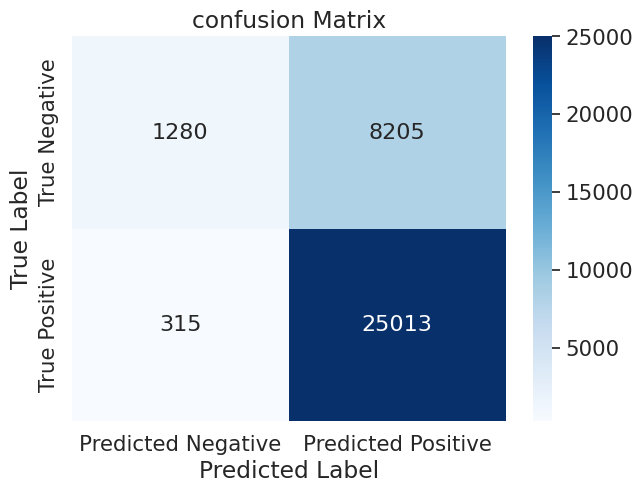

In [39]:
sns.set(font_scale=1.4)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot= True, fmt = 'd',cmap = 'Blues', annot_kws = {'size':16},
            xticklabels = ['Predicted Negative', 'Predicted Positive'],
            yticklabels = ['True Negative', 'True Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('confusion Matrix')
plt.show()

In [40]:
classification_rep = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.13      0.23      9485
         1.0       0.75      0.99      0.85     25328

    accuracy                           0.76     34813
   macro avg       0.78      0.56      0.54     34813
weighted avg       0.77      0.76      0.68     34813



In [41]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = best_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [42]:
print("AUC:", auc)

AUC: 0.5612565460608582


In [43]:
import matplotlib.pyplot as plt


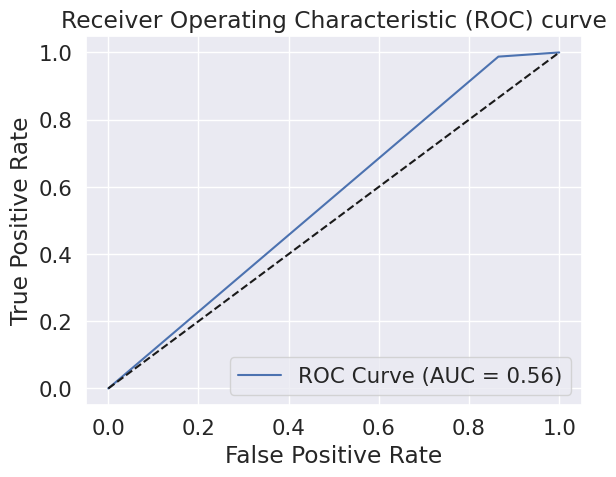

In [44]:
plt.plot(fpr, tpr, label = 'ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

In [45]:
from sklearn.metrics import matthews_corrcoef

# Calculate the Matthew Correaltion Coeffient
mcc = matthews_corrcoef(y_test, predictions)
print(("Matthew Correlation Coefficient(MCC):", mcc))

('Matthew Correlation Coefficient(MCC):', 0.26087624428430184)
